# Polynomial Regression
The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias). In this part of the exercise, you will address this problem by adding more features.<br><br>

The file <strong><em>ex5data1</em></strong> contains a data set which includes train set, test set, validation set.<br>
The structure of the dataset described blow:<br>
1. x = **Water level (a single feature)**
2. y = **Value of flowed water**
3. xval = **x validation set**
4. yval = **y validation set**
5. xtest = **x test set**
6. ytest = **y test set**


<br><br>
<strong>
Our assignment has these sections:
1. Visualizing the Data
    1. Converting .mat to .csv
    2. Loading Dataset
    3. Visualizing The Dataset
2. Adding Polynomial Features
3. Learning Polynomial Regression
    1. Implementation
    2. Test Cost Function
4. Adjusting The Regularization Parameter
    1. Implementation
    2. Test Gradient Function
5. Selecting λ Using a Cross Validation Set
    1. Implementation
    2. Visualziation of Fitted Model
6. Computing Test Set Error
    1. Learning Curves
    2. 
7. Plotting Learning Curves With Randomly Selected Examples
    
</strong>

In each section full description provided.

## 1. Visualizing the Dataset
Before starting on any task, it is often useful to understand the data by visualizing it.<br>

### 1.A Converting .mat to .csv
In this specific assignment, the instructor added a .mat file as training set and weights of trained neural network. But we have to convert it to .csv to use in python.<br>
After all we now ready to import our new csv files to pandas dataframes and do preprocessing on it and make it ready for next steps.

In [1]:
# import libraries
import scipy.io
import numpy as np

data = scipy.io.loadmat("ex5data1")

Now we **extract** `x`, `y`, `xval`, `yval`, `xtest` and `ytest`</strong> variables from the .mat file and save them into .csv file for further usage. After running the below code you should see:
1. X.csv
2. y.csv 
3. Xtest.csv
4. ytest.csv
5. Xval.csv
6. yval.csv

files in your directory.

In [2]:
for i in data:
    if '__' not in i and 'readme' not in i:
        np.savetxt((i+".csv"),data[i],delimiter=',')

### 1.B Loading Dataset
First we import .csv files into pandas dataframes then save them into numpy arrays.<br><br>

In [3]:
# import library
import pandas as pd

# saving .csv files to pandas dataframes
x_df = pd.read_csv('X.csv',names= ['x'])
xtest_df = pd.read_csv('Xtest.csv',names= ['xtest'])
xval_df = pd.read_csv('Xval.csv',names= ['xval'])
y_df = pd.read_csv('y.csv',names=['y'])
ytest_df = pd.read_csv('ytest.csv',names= ['ytest'])
yval_df = pd.read_csv('yval.csv',names= ['yval'])

In [14]:
x_df.head(3)

,x
0,-15.936758
1,-29.152979
2,36.189549


In [5]:
y_df.head(3)

,y
0,2.134311
1,1.173257
2,34.359109


Now we convert all **pandas dataframes** to **numpy arrays** for calculations.

In [6]:
# saving x, y, xval, yval, xtest and ytest into numpy arrays
x = x_df.iloc[:,:].values
xval = xval_df.iloc[:,:].values
xtest = xtest_df.iloc[:,:].values

y = y_df.iloc[:,:].values
yval = yval_df.iloc[:,:].values
ytest = ytest_df.iloc[:,:].values

# number of examples and number of features
m, n = x.shape

# add 1's to the features of x as bias
x = np.append(np.ones(shape=(m,1)),x,axis = 1)
xval = np.append(np.ones(shape=(xval.shape[0],1)),xval,axis = 1)
xtest = np.append(np.ones(shape=(xtest.shape[0],1)),xtest,axis = 1)



m_val = xval.shape[0]
m_test = xtest.shape[0]

print('#{} Number of training samples, #{} features per sample'.format(m,n))
print('#{} Number of validation samples, #{} features per sample'.format(m_val,n))
print('#{} Number of test samples, #{} features per sample'.format(m_test,n))

#12 Number of training samples, #1 features per sample
#21 Number of validation samples, #1 features per sample
#21 Number of test samples, #1 features per sample


In [7]:
# define some hypter parameters

# define theta as zero
theta = None

# define hyperparameter λ
lambda_ = None

# reshape (-1,1) because we just have one feature in y column
y = y.reshape(-1,1)

### 1.C Ploting Dataset
We will begin by visualizing the dataset containing historical records on **the change in the water level**, `x`, and **the amount of water flowing out of the dam**, `y`.<br><br>
This dataset is divided into three parts:<br>
    • A **training set** that your model will learn on: `x`, `y`<br>
    • A **cross validation set** for determining the regularization parameter: `xval`, `yval`<br>
    • A **test set** for evaluating performance. These are **"unseen" examples** which your model did not see during training: `xtest`, `ytest`<br>

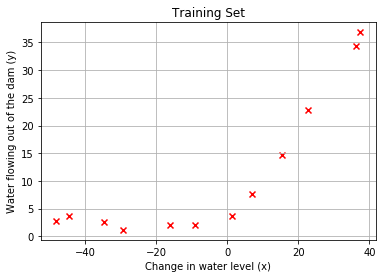

In [8]:
# import libraries
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x[:,1], y, color='red', marker='x')
plt.title('Training Set')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.grid()
plt.show()

# 2. Adding Polynomial Features

For use polynomial regression, our hypothesis has the form:<img src='img/poly.jpg'>
Notice that by defining `x1 = (waterLevel)`, `x2 = (waterLevel)`<sup>2</sup>, ... , `xp = (waterLevel)`<sup>p</sup>, we obtain a linear regression model where the features are the various powers of the original value (waterLevel).<br><br>
Now, you will **add more features using the higher powers** of the existing feature `x` in the dataset. Your task write a function so that the function **maps the original training set `x` of size `m × 1` into its higher powers**. Specifically, when a training set `x` of size `m × 1` is passed into the function, the **function should return a `m × p` matrix `x_poly`**, where column `1` holds the original values of `x`, column `2` holds the values of `x^2`, column `3` holds the values of `x^3`, and so on.<br> 
Note that **you don’t have to account for the zero-eth power in this function**.

## 2.A Adding Features
`poly_features(x, p)` takes a data matrix `x` (size `m x 1`) and **maps each example into its polynomial features** where <br>
`x_poly[i, :] = [x(i) x(i)^2 x(i)^3 ...  x(i)^p]`

In [39]:
x_poly = None # the output of polu_features
p = 8 # order of polynomial features

from sklearn.preprocessing import PolynomialFeatures # import libraries
def poly_features(x,p):    
    polynomial_features = PolynomialFeatures(degree=8, include_bias=True)
    x_poly = polynomial_features.fit_transform(x)
    return x_poly
    

In [43]:
x_poly = poly_features(x[:,1:],p)
x_poly_df = pd.DataFrame(x_poly,columns=None)
x_poly_df.head(3)

,0,1,2,3,4,5,6,7,8
0,1.0,-15.936758,253.980260,-4047.621971,6.450597e+04,-1.028016e+06,1.638324e+07,-2.610958e+08,4.161020e+09
1,1.0,-29.152979,849.896197,-24777.006175,7.223235e+05,-2.105788e+07,6.139000e+08,-1.789701e+10,5.217513e+11
2,1.0,36.189549,1309.683430,47396.852168,1.715271e+06,6.207487e+07,2.246462e+09,8.129843e+10,2.942154e+12


#### Now we add these features to `xtest` and `xval`

In [51]:
xval_poly = poly_features(xval[:,1:],p)
xval_poly_df = pd.DataFrame(xval_poly,columns=None)
xval_poly_df.head(3)

,0,1,2,3,4,5,6,7,8
0,1.0,-16.746536,280.446461,-4696.506686,7.865022e+04,-1.317119e+06,2.205718e+07,-3.693813e+08,6.185857e+09
1,1.0,-14.577471,212.502653,-3097.751215,4.515738e+04,-6.582804e+05,9.596063e+06,-1.398863e+08,2.039189e+09
2,1.0,34.515759,1191.337596,41119.920932,1.419285e+06,4.898771e+07,1.690848e+09,5.836090e+10,2.014371e+12


In [45]:
xtest_poly = poly_features(xtest[:,1:],p)
xtest_poly_df = pd.DataFrame(xtest_poly,columns=None)
xtest_poly_df.head(3)

,0,1,2,3,4,5,6,7,8
0,1.0,-33.318004,1110.089390,-36985.962723,1.232298e+06,-4.105772e+07,1.367961e+09,-4.557774e+10,1.518559e+12
1,1.0,-37.912164,1437.332181,-54492.373421,2.065924e+06,-7.832364e+07,2.969419e+09,-1.125771e+11,4.268041e+12
2,1.0,-51.206938,2622.150494,-134272.297639,6.875673e+06,-3.520822e+08,1.802905e+10,-9.232124e+11,4.727488e+13


## 2.B Normalize Features
`feature_normalize(x)` returns a **normalized version** of `x` where the **mean value of each feature is 0** and the **standard deviation is 1**. This is often a **good preprocessing step** to do when working with learning algorithms.

In [59]:
def feature_normalize(x, xtest, xval):
    sigma = x.std()
    mean = x.mean()
    x_norm = (x-mean)/sigma
    xtest_norm = (xtest-mean)/sigma
    xval_norm = (xval-mean)/sigma
    return (x_norm, xtest_norm, xval_norm)

In [61]:
x_poly_norm, xtest_poly_norm, xval_poly_norm = feature_normalize(x_poly,xtest_poly, xval_poly)

In [62]:
print('x_poly_norm : mean= {}, std={}.'.format(x_poly_norm.mean(),x_poly_norm.std()))
print('xval_poly_norm : mean= {}, std={}.'.format(xval_poly_norm.mean(),xval_poly_norm.std()))
print('xtest_poly_norm : mean= {}, std={}.'.format(xtest_poly_norm.mean(),xtest_poly_norm.std()))

x_poly_norm : mean= -2.441462669893284e-17, std=1.0.
xval_poly_norm : mean= -0.09705854511259113, std=2.292603675587702e-06.
xtest_poly_norm : mean= -0.09705834103281052, std=4.722242769115049e-06.


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
